# THE SPARKS FOUNDATION
DATA SCIENCE and BUSINESS ANALYTICS INTERNSHIP(GRIP MAR'21)

**AUTHOR: AAMIR P**

TASK 3: Exploratory Data Analysis - Retail

**PROBLEM STATEMENT**

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

 ● As a business manager, try to find out the weak areas where you can work to make more profit. 
 
 ● What all business problems you can derive by exploring the data?


**IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**IMPORT FROM DRIVE**

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**READ DATA FROM DRIVE AND RUN THE DATA**

In [4]:
data = pd.read_csv("/content/drive/MyDrive/SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**EXPLORE THE DATA**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**TO GET THE STATISTICS OF DATA**

In [6]:
data.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**TO CHECK WHETER ANY DATA IS MISSING**

In [7]:
data.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**TO CHECK FOR DUPLICATES IN DATASET**

In [8]:
sum(data.duplicated(subset = None, keep = 'first'))


17

**TO REMOVE THE DUPLICATES**

In [9]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)


In [10]:
data.shape


(9977, 13)

In [11]:
def getUnique(data,  target_variable, sort_by, color, threshold_categories = 10):
    
    total_cols = [i for i in data.columns.values if len(data[i].unique()) < threshold_categories and len(data[i].unique()) > 1]
    
    fig = plt.figure(figsize = (20,20))
    rows = len(total_cols) // 2
    cols = len(total_cols) // 2
    
    for i, num in zip(total_cols, range(1,len(total_cols)+1)):
        ax = fig.add_subplot(rows,cols,num)
        data.groupby(i)[target_variable].sum().sort_values(by = sort_by, ascending = False).plot(kind = 'bar', ax = ax, title = i, color = color)

    plt.tight_layout(pad = 3.0)
    plt.show()

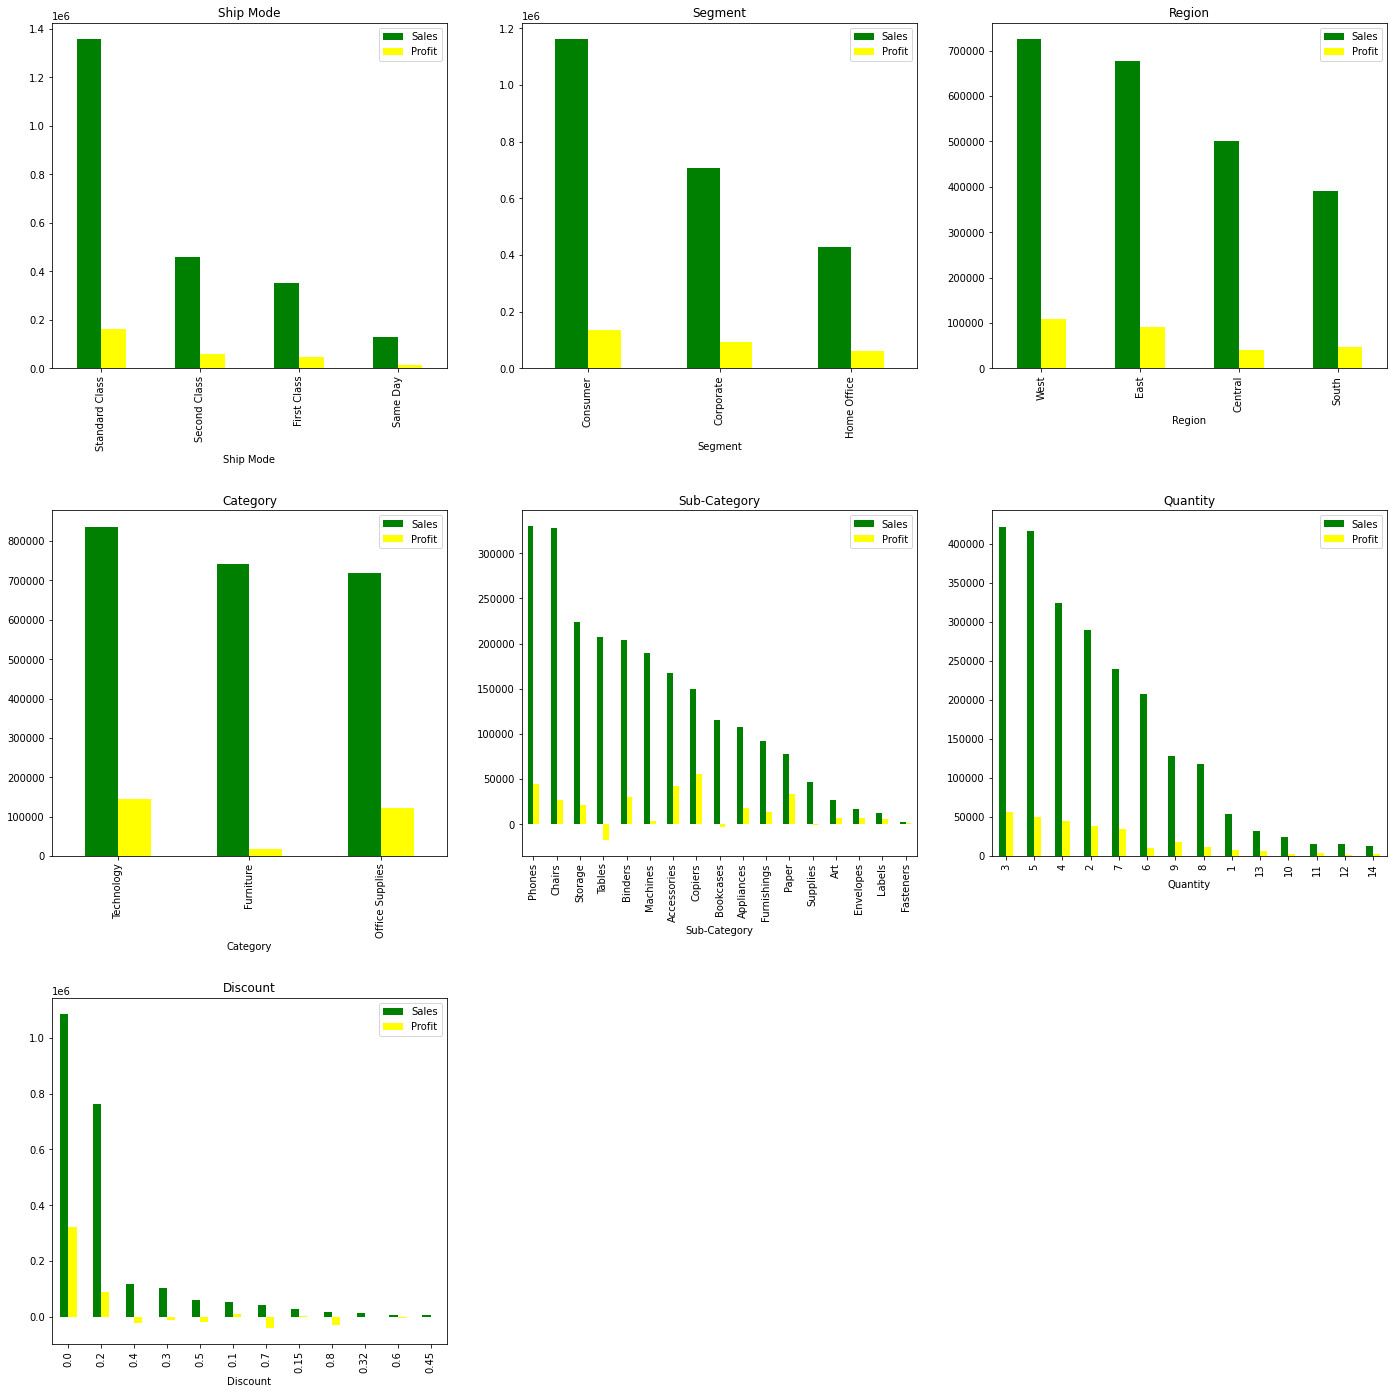

In [12]:
num_categories = 20
target_variable = ["Sales","Profit"]
sort_by = "Sales"
color = ["green", "yellow"]
getUnique(data, target_variable, sort_by, color, num_categories)

# **What I observed the tables?**
1. The profit of copiers is high.
2. Sales of Office supplies is low but the profit is high.

**TO FIND UNIQUE STATEMENTS IN AN ARRAY**

In [13]:
data.State.unique()


array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

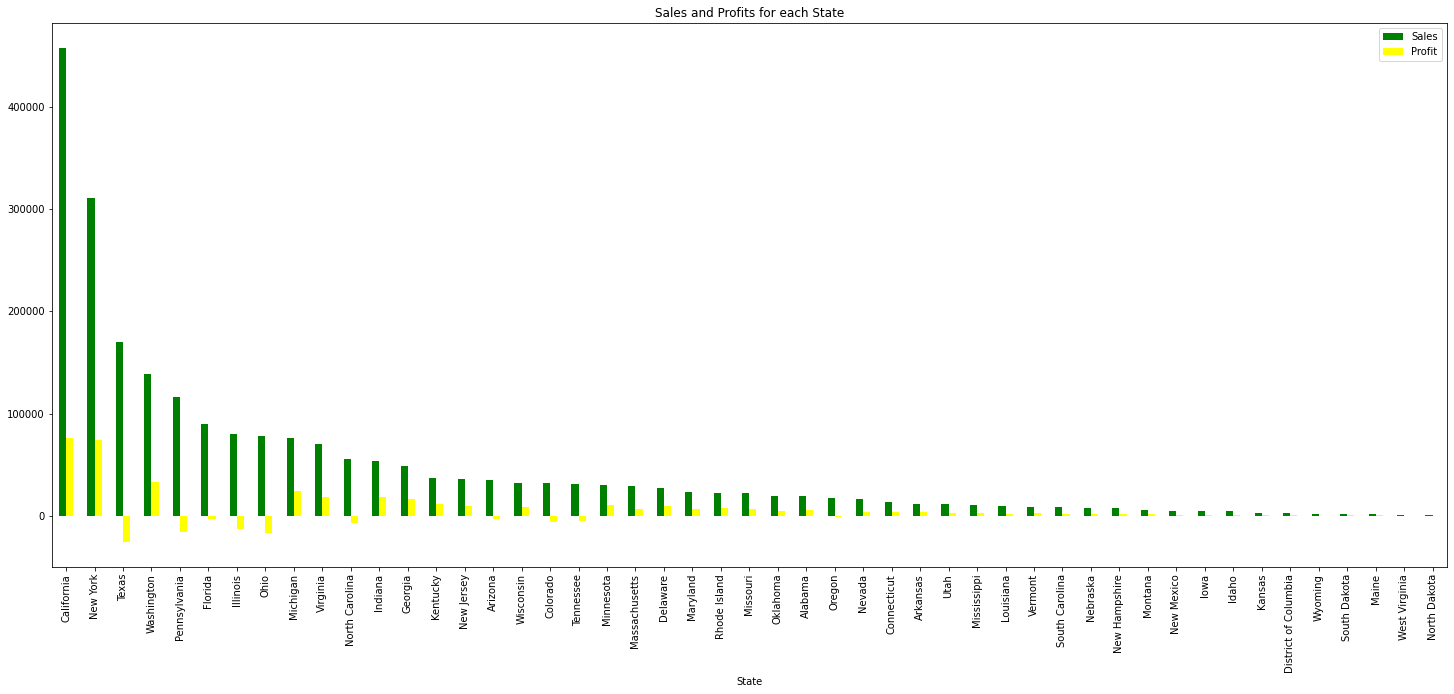

In [14]:
plt.rcParams["figure.figsize"] = [25,10]
data.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["green", "yellow"])
plt.title("Sales and Profits for each State")
plt.show()


# **What I observed from above?**
The states with high sales are generating less profit.

# **What I observed the tables?**
1. The profit of copiers is high.
2. Sales of Office supplies is low but the profit is high.

In [20]:
data.groupby("State").sum()['Discount'].sort_values(ascending = False)


State
Texas                   364.24
Pennsylvania            192.70
Illinois                191.10
Ohio                    152.10
California              145.60
Florida                 114.65
North Carolina           70.60
Arizona                  68.00
New York                 62.40
Colorado                 57.60
Tennessee                53.30
Oregon                   35.60
Washington               32.40
Utah                      3.20
Nevada                    2.40
New Mexico                2.20
Massachusetts             2.10
Michigan                  1.80
Idaho                     1.80
Rhode Island              1.20
Montana                   1.00
Delaware                  0.60
New Jersey                0.60
Connecticut               0.60
Maryland                  0.60
New Hampshire             0.30
West Virginia             0.30
Wyoming                   0.20
Minnesota                 0.00
Georgia                   0.00
Virginia                  0.00
Arkansas                  0.00
Ve

**I am comparing the bar graph with the above table**

In [17]:
states_df = data.groupby("State")[["Sales","Profit","Discount"]].sum().sort_values(by = "Sales", ascending = False)
states_df

,Sales,Profit,Discount
State,,,
California,457576.2715,76330.7891,145.60
New York,310827.1510,74015.4622,62.40
Texas,170124.5418,-25750.9833,364.24
Washington,138560.8100,33368.2375,32.40
Pennsylvania,116496.3620,-15565.4035,192.70
Florida,89473.7080,-3399.3017,114.65
Illinois,80162.5370,-12601.6500,191.10
Ohio,77976.7640,-16959.3178,152.10
Michigan,75879.6440,24428.0903,1.80


**The states with less profit are allowed with more profit now.**

In [18]:
states_df['Discount'][states_df['Profit'] < 0].sort_values(ascending = True)


State
Oregon             35.60
Tennessee          53.30
Colorado           57.60
Arizona            68.00
North Carolina     70.60
Florida           114.65
Ohio              152.10
Illinois          191.10
Pennsylvania      192.70
Texas             364.24
Name: Discount, dtype: float64

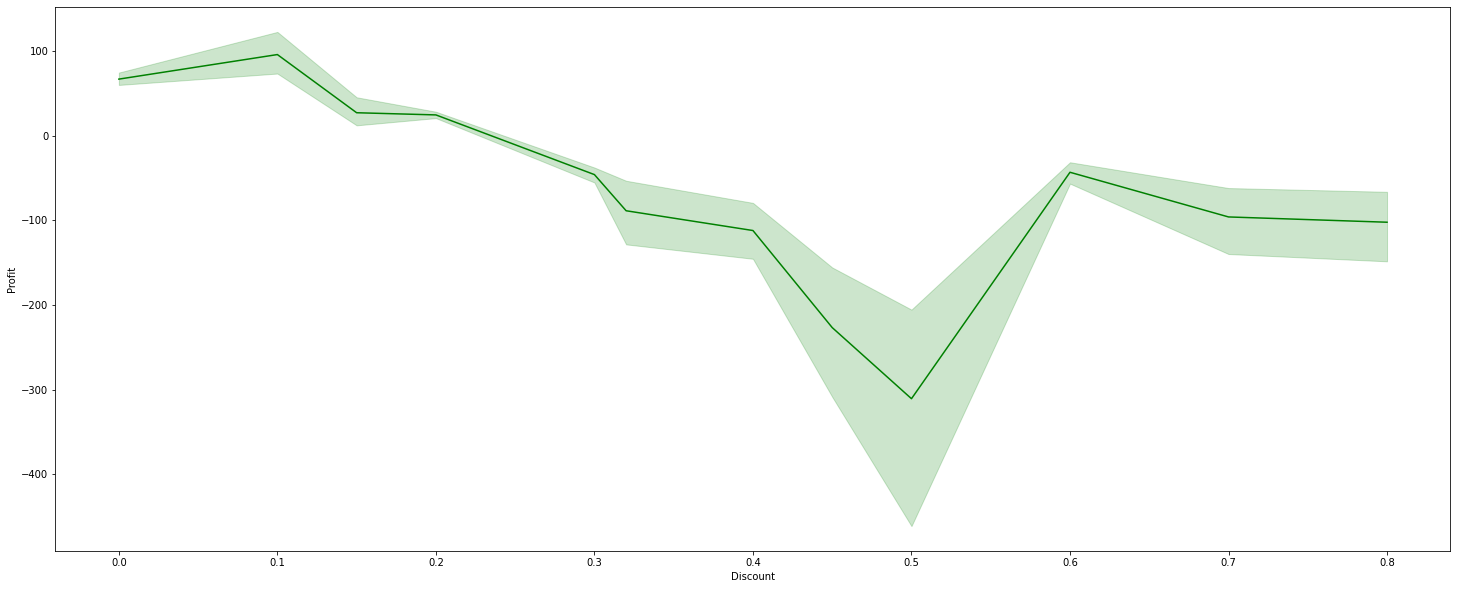

In [19]:
sns.lineplot(x = "Discount", y = "Profit", data = data, color = "green")
plt.show()


# **What I observed from above chat?**
As the profit is increasing the Profit generated is decreased.